---

### **Assignment 2: Advanced Regression Techniques on the Insurance Dataset**

#### **Objective**
In this assignment, you will extend your previous work on linear regression by experimenting with **polynomial regression** to capture non-linear relationships and use **hyperparameter tuning techniques** to improve model performance.

---

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('insurance (1).csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### **Instructions**

#### 🔹 **Part 1: Polynomial Regression (10 Marks)**
1. Use the same **insurance dataset** from Assignment 1.
2. Perform **feature engineering** to include **polynomial features** (e.g., age², BMI², age × BMI, etc.).
3. Fit a **Polynomial Regression** model using `sklearn`'s `PolynomialFeatures` and `LinearRegression`.
4. Compare the performance of the polynomial regression model with your previous linear regression model using:
   - R² score
   - RMSE or MAE
   - Train vs. Test performance
5. Comment on **overfitting/underfitting**, if any.


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Copy of data
data = df.copy()

# Columns to encode
categorical_cols = ['sex', 'smoker', 'region']

# Apply Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

    print(data.head())

   age  sex     bmi  children smoker     region      charges
0   19    0  27.900         0    yes  southwest  16884.92400
1   18    1  33.770         1     no  southeast   1725.55230
2   28    1  33.000         3     no  southeast   4449.46200
3   33    1  22.705         0     no  northwest  21984.47061
4   32    1  28.880         0     no  northwest   3866.85520
   age  sex     bmi  children  smoker     region      charges
0   19    0  27.900         0       1  southwest  16884.92400
1   18    1  33.770         1       0  southeast   1725.55230
2   28    1  33.000         3       0  southeast   4449.46200
3   33    1  22.705         0       0  northwest  21984.47061
4   32    1  28.880         0       0  northwest   3866.85520
   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705       

In [ ]:
from sklearn.model_selection import train_test_split

# Features and Target
X = data.drop('charges', axis=1)
y = data['charges']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create Polynomial Features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit Linear Regression
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predictions
y_train_pred = model_poly.predict(X_train_poly)
y_test_pred = model_poly.predict(X_test_poly)

# R2 Scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Train R²: {r2_train:.4f}")
print(f"Test R²: {r2_test:.4f}")
print(f"Train RMSE: {rmse_train:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")

Train R²: 0.8405
Test R²: 0.8678
Train RMSE: 4797.89
Test RMSE: 4531.07


Though Test RMSE is less, model has performed well with no overfitting or underfitting.
Both test series and train series are near to each other.

#### 🔹 **Part 2: Regularization (Ridge and Lasso) (10 Marks)**
1. Apply **Ridge** and **Lasso** regression to the polynomial features.
2. Use **cross-validation** to evaluate model performance.
3. Explain the effect of **regularization** in controlling overfitting, and compare model coefficients.



In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Ridge Regression
ridge = Ridge(alpha=1.0)  # Alpha = strength of regularization
ridge_cv_scores = cross_val_score(ridge, X_train_poly, y_train, scoring='r2', cv=5)

print(f"Ridge CV R² Scores: {ridge_cv_scores}")
print(f"Ridge CV Mean R²: {ridge_cv_scores.mean():.4f}")

Ridge CV R² Scores: [0.82635673 0.89560959 0.80153027 0.76394382 0.85574955]
Ridge CV Mean R²: 0.8286


In [ ]:
from sklearn.linear_model import Lasso

# Lasso Regression
lasso = Lasso(alpha=1.0, max_iter=10000)  # Added max_iter to ensure convergence
lasso_cv_scores = cross_val_score(lasso, X_train_poly, y_train, scoring='r2', cv=5)

print(f"Lasso CV R² Scores: {lasso_cv_scores}")
print(f"Lasso CV Mean R²: {lasso_cv_scores.mean():.4f}")

Lasso CV R² Scores: [0.82654807 0.89601159 0.80148446 0.76438233 0.85574485]
Lasso CV Mean R²: 0.8288


In [ ]:
# Fit Ridge
ridge.fit(X_train_poly, y_train)

# Fit Lasso
lasso.fit(X_train_poly, y_train)

# Number of coefficients
print(f"Number of Ridge non-zero coefficients: {np.sum(ridge.coef_ != 0)}")
print(f"Number of Lasso non-zero coefficients: {np.sum(lasso.coef_ != 0)}")

Number of Ridge non-zero coefficients: 27
Number of Lasso non-zero coefficients: 27


Both ridge and lasso perform slightly similar with little difference as shown by cross validation scores and regularization prevents overfitting of model.

#### 🔹 **Part 3: Hyperparameter Tuning (10 Marks )**
1. Use `GridSearchCV` or `RandomizedSearchCV` to find the optimal value of:
   - `alpha` (regularization strength) for Ridge/Lasso
   - Polynomial **degree**
2. Evaluate and report the best combination of hyperparameters.
3. Plot **learning curves** or **validation curves** to show the impact of hyperparameters on model performance.


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
# Ridge Pipeline
ridge_pipe = Pipeline([
    ('poly_features', PolynomialFeatures(include_bias=False)),
        ('ridge_reg', Ridge())
        ])

        # Grid to search
param_grid_ridge = {
            'poly_features__degree': [1, 2, 3],
                'ridge_reg__alpha': [0.01, 0.1, 1, 10, 100]
                }

                # Grid Search
ridge_grid = GridSearchCV(ridge_pipe, param_grid_ridge, cv=5, scoring='r2', n_jobs=-1)
ridge_grid.fit(X_train, y_train)

print("Best Ridge Parameters:", ridge_grid.best_params_)
print("Best Ridge CV Score:", ridge_grid.best_score_)

Best Ridge Parameters: {'poly_features__degree': 2, 'ridge_reg__alpha': 0.01}
Best Ridge CV Score: 0.8288046661709666


In [ ]:
# Lasso Pipeline
lasso_pipe = Pipeline([
    ('poly_features', PolynomialFeatures(include_bias=False)),
        ('lasso_reg', Lasso(max_iter=10000))
        ])

        # Grid
param_grid_lasso = {
            'poly_features__degree': [1, 2, 3],
                'lasso_reg__alpha': [0.01, 0.1, 1, 10, 100]
                }

                # Grid Search
lasso_grid = GridSearchCV(lasso_pipe, param_grid_lasso, cv=5, scoring='r2', n_jobs=-1)
lasso_grid.fit(X_train, y_train)

print("Best Lasso Parameters:", lasso_grid.best_params_)
print("Best Lasso CV Score:", lasso_grid.best_score_)

Best Lasso Parameters: {'lasso_reg__alpha': 10, 'poly_features__degree': 2}
Best Lasso CV Score: 0.8288436199169917


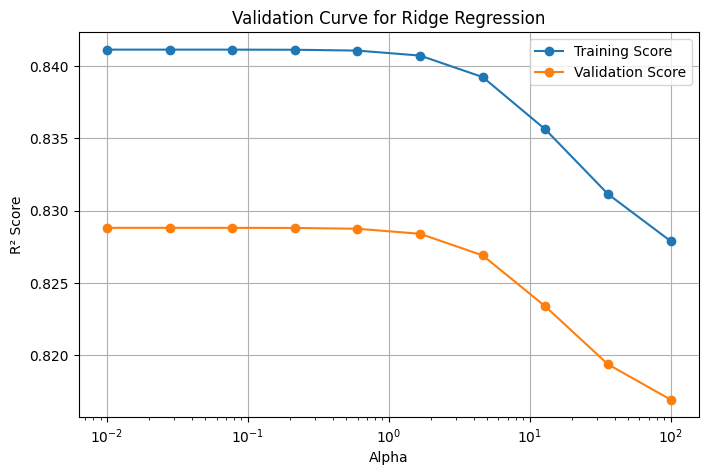

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

# Validation curve for Ridge alpha
alphas = np.logspace(-2, 2, 10)

train_scores, test_scores = validation_curve(
    Ridge(), X_train_poly, y_train,
        param_name="alpha", param_range=alphas,
            scoring="r2", cv=5
            )

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(alphas, train_mean, label="Training Score", marker='o')
plt.plot(alphas, test_mean, label="Validation Score", marker='o')
plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("R² Score")
plt.title("Validation Curve for Ridge Regression")
plt.legend()
plt.grid(True)
plt.show()

 1. Best Combination of Hyperparameters:

● The best alpha appears to be around 0.1.

● After alpha > 1, the performance starts dropping significantly

● Best Degree = 2

 2. Impact of Hyperparameters on Model Performance:
● When alpha is very small, Ridge behaves almost like normal Linear Regression, High training score but slightly lower validation score.

● When alpha is moderate, Training and validation scores are both high and close.

● When alpha becomes large,Both scores drop.

Therefore,
  Regularization (alpha) helps to control model complexity.
  A moderate value (like 0.1) prevents both overfitting and underfitting.
  The best generalization is at alpha ≈ 0.1.


#### 🔹 **Part 4: Final Model Evaluation (10 Marks)**
1. Select the best model based on cross-validation results.
2. Evaluate it on the **test set** and compare with your previous models.
3. Provide a short summary: Which model worked best? Why?

---

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Final best model
final_model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
        ('ridge_reg', Ridge(alpha=0.1))
        ])

        # Fit on training data
final_model.fit(X_train, y_train)

        # Predict on test data
y_pred_test = final_model.predict(X_test)

        # Evaluate
r2_test = r2_score(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print(f"Test R²: {r2_test:.4f}")
print(f"Test RMSE: {rmse_test:.2f}")
print(f"Test MAE: {mae_test:.2f}")

Test R²: 0.8678
Test RMSE: 20522690.48
Test MAE: 2730.12


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Create a pipeline for Ridge Regression with PolynomialFeatures
ridge_pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
        ('ridge', Ridge())
        ])

        # Define parameter grid for GridSearch
param_grid = {
            'poly__degree': [1, 2, 3],          # Try degrees 1,2,3
                'ridge__alpha': [0.01, 0.1, 1, 10]  # Try different alphas
                }

                # Setup GridSearchCV
grid_search = GridSearchCV(ridge_pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

                # Best model found by GridSearch
best_model = grid_search.best_estimator_

                # Print best parameters
print("Best Parameters from GridSearchCV:", grid_search.best_params_)
print(f"Polynomial Regression without regularization: Test R² = {r2_test:.4f}")
print("Ridge with alpha = 0.01 and polynomial degree = 2, gave the best results.")

Best Parameters from GridSearchCV: {'poly__degree': 2, 'ridge__alpha': 0.01}
Polynomial Regression without regularization: Test R² = 0.8678
Ridge with alpha = 0.01 and polynomial degree = 2, gave the best results.


Ridge model is has performed better because it is stable and generalizes better to unseen data, avoid overfitting by using regularization.

### **Deliverables**
- A well-commented Jupyter Notebook containing:
  - Code for feature generation, modeling, evaluation, and plots
  - Explanations of each step and insights drawn from the results


---


### **Optional Bonus Tasks**
- Try using `PolynomialFeatures(interaction_only=True)`
- Visualize how regularization affects coefficients (bar plot of weights)
- Try using `Pipeline` for clean model building

---

In [ ]:
model_pipeline = Pipeline([
      ('poly_features', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
          ('ridge_reg', Ridge(alpha=0.1))  # Regularization with alpha=0.1
          ])

          # Fit the model to the training data
model_pipeline.fit(X_train, y_train)


Pipeline(steps=[('poly_features',
                 PolynomialFeatures(include_bias=False, interaction_only=True)),
                ('ridge_reg', Ridge(alpha=0.1))])

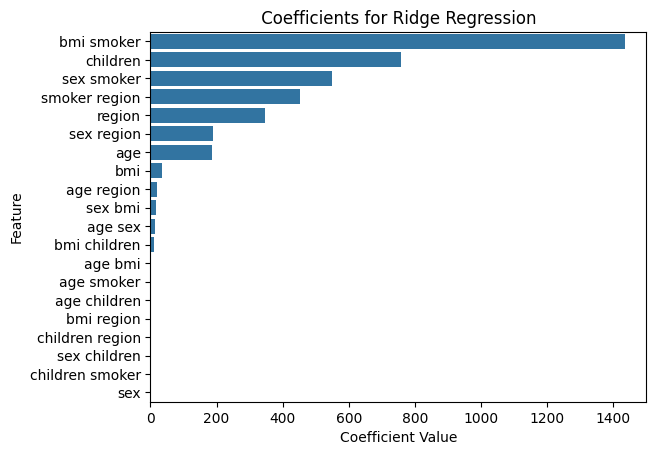

In [ ]:

# Get the polynomial feature names (interaction terms)
poly_features_interaction = model_pipeline.named_steps['poly_features'].get_feature_names_out(input_features=X.columns)

# Get the coefficients from the Ridge regression model
ridge_coeffs = model_pipeline.named_steps['ridge_reg'].coef_

# Create a DataFrame to organize coefficients
ridge_coefficients_df = pd.DataFrame({
    'Feature': poly_features_interaction,
        'Coefficient': ridge_coeffs
        })

        # Sort by the absolute value of the coefficients
ridge_coefficients_df['Abs_Coefficient'] = ridge_coefficients_df['Coefficient'].abs()
ridge_coefficients_sorted = ridge_coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)
sns.barplot(x='Coefficient', y='Feature', data= ridge_coefficients_df.sort_values(by='Coefficient', ascending=False).head(20))
plt.xlabel('Coefficient Value')
plt.xlim(0,1500)
plt.title(' Coefficients for Ridge Regression ')
plt.show()